# model of ring and injector vacuum system
Units are cm and liter

In [5]:
from vacuum_modeling.vacuum_analyzer import VacuumSystem,solve_vac_system,show_vac_sys,vacuum_lifetime,Tube
from vacuum_modeling.vacuum_constants import big_ion_pump_speed,small_ion_pump_speed,outgassing_rates
from constants import gas_masses
import matplotlib.pyplot as plt
vacuum_lifetime(1e-10,'He'),vacuum_lifetime(1e-10,'H2')

(208.43398580595323, 50.71893654611529)

# dump chamber model

model of chamber that helium load falls into

In [4]:
def helium_dump_back_gas_load():
    Q = 4e-5  # assuming 1 cm hole located 2 meter from nozzle,60 sccm, and dump chamber is 3 meter from nozzle
    dummy_speed=1e9 #assume that none of the helium that wanders back through the tube returns
    vac_sys = VacuumSystem(gas_mass_Daltons=gas_masses['He'])
    vac_sys.add_chamber(Q=Q, S=1000)
    vac_sys.add_tube(50, 1.8)
    vac_sys.add_chamber(S=dummy_speed)
    solve_vac_system(vac_sys)
    Q_back = vac_sys.components[-1].P * vac_sys.components[-1].S()
    return Q_back
helium_dump_back_gas_load()

1.515996958977292e-07

# injector model

bumping and mode matching lens. three stages of differential pumping to fight the helium

/Users/williamdebenham/Desktop/storageRing/storageRing/storageRingModel/vacuum_modeling/vacuum_analyzer.py:77: UserWarning: Tube length should be several times longer than diam for more accurate results
  warnings.warn('Tube length should be several times longer than diam for more accurate results')


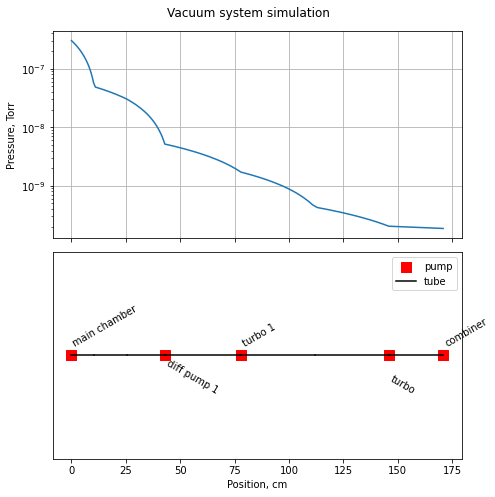

3.746909287786682e-09 1.873454643893341e-10
--Component information-- 
component type: Chamber
name: combiner
P: 1.873454643893341e-10
_S: 20.0
Q: 0.0
input_tube: None



111.25648890692852

In [5]:
big_chamber_pressure=3e-7 #from helium flow

gas='He'

vac_sys_inj=VacuumSystem(gas_mass_Daltons=gas_masses[gas])
vac_sys_inj.add_chamber(P=big_chamber_pressure,name='main chamber')

vac_sys_inj.add_tube(10.5,1.8)
vac_sys_inj.add_tube(15,4.8)
vac_sys_inj.add_tube(17.4,4.6)
vac_sys_inj.add_chamber(S=940,input_tube=Tube(5.0,10.0), name='diff pump 1')
vac_sys_inj.add_tube(35,4.6)
vac_sys_inj.add_chamber(S=200,input_tube=Tube(5.0,5.0),name='turbo 1')
#
vac_sys_inj.add_tube(34,3.1)
vac_sys_inj.add_tube(34,5.5)
vac_sys_inj.add_chamber(S=200,input_tube=Tube(5.0,5.0),name='turbo')
vac_sys_inj.add_tube(25,5.5)




vac_sys_inj.add_chamber(S=big_ion_pump_speed[gas],name='combiner')
# vac_sys_inj.add_chamber(S=0)
%matplotlib inline
solve_vac_system(vac_sys_inj)
show_vac_sys(vac_sys_inj,dpi=300,fig_size=(7,7))
Q_injector=vac_sys_inj.components[-1].P*vac_sys_inj.components[-1].S()
print(Q_injector,vac_sys_inj.components[-1].P)
print(vac_sys_inj.chambers()[-1])
vacuum_lifetime(vac_sys_inj.components[-1].P,gas)

# ring model

In [15]:
def add_split_bend_vacuum(vac_sys, rp_ID, L_split_bend, S_small_pumps, q):
    vac_sys.add_tube(L_split_bend, rp_ID, q=q)
    vac_sys.add_chamber(S=S_small_pumps, name='bend',input_tube=Tube(2.6,1.2))
    vac_sys.add_tube(L_split_bend, rp_ID, q=q)

/Users/williamdebenham/Desktop/storageRing/storageRing/storageRingModel/vacuum_modeling/vacuum_analyzer.py:77: UserWarning: Tube length should be several times longer than diam for more accurate results
  warnings.warn('Tube length should be several times longer than diam for more accurate results')


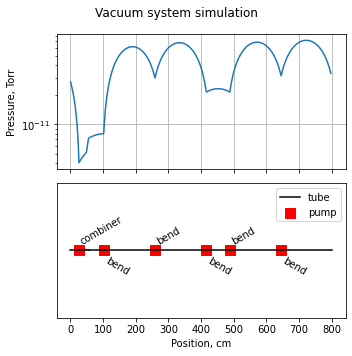

tau: 112.7616400685324
Pressure: 4.4978892214843785e-11


In [22]:
%matplotlib tk
L_split_bend=157
bender_ID=1.6 # magnet is 1.8, undersize for vacuum

L_long_connecting_tube=71.7
long_tube_ID=3.6



gas='H2'
q=outgassing_rates[gas]
Q_combiner=Q_injector if gas =='He' else 0.0

vac_sys = VacuumSystem(is_circular=True, gas_mass_Daltons=gas_masses[gas])
vac_sys.add_tube(26.6,1.8,q=q)
vac_sys.add_chamber(S=big_ion_pump_speed[gas], name='combiner',input_tube=Tube(6.2,5.2),Q=Q_combiner)
vac_sys.add_tube(23,7,q=q)
vac_sys.add_tube(6.5,3.5,q=q)
vac_sys.add_tube(46,7.5,q=q)
vac_sys.add_chamber(S=small_ion_pump_speed[gas],input_tube=Tube(3.5,4.5),name='bend')

add_split_bend_vacuum(vac_sys, bender_ID, L_split_bend, small_ion_pump_speed[gas], q)

vac_sys.add_chamber(S=small_ion_pump_speed[gas],input_tube=Tube(2.3,3.0),name='bend')
vac_sys.add_tube(L_long_connecting_tube, long_tube_ID,q=q)
vac_sys.add_chamber(S=small_ion_pump_speed[gas],input_tube=Tube(2.3,3.0),name='bend')
add_split_bend_vacuum(vac_sys, bender_ID, L_split_bend, small_ion_pump_speed[gas], q)
solve_vac_system(vac_sys)
%matplotlib inline
show_vac_sys(vac_sys,save_fig='ring_vac',dpi=300,fig_size=(5,5))

print('tau:',vacuum_lifetime(vac_sys.P_mean,gas))
print('Pressure:',vac_sys.P_mean)
# for chamber in vac_sys.chambers():
#     print(chamber)

In [10]:
Tube(2.6,1.2).C(2.0)

30.656693879733545